In [3]:
import PIL
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import random
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf

#from tensorflow.python.framework import ops

from numpy import save
from numpy import load

In [4]:
DATADIR='G:/Downloads/kagglecatsanddogs_3367a(1)/PetImages'
CATEGORIES=['Cat','Dog']

IMG_SIZE=50

In [5]:
%%time
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

Wall time: 2min 54s


In [6]:
random.shuffle(training_data)

In [7]:
X_all=[]
y_all=[]
for categories, label in training_data:
    X_all.append(categories)
    y_all.append(label)

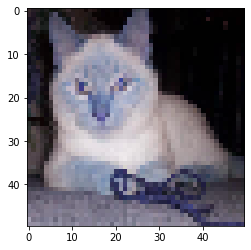

In [8]:
plt.imshow(X_all[5])
plt.show()

In [9]:
X = np.array(X_all).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [10]:
X.shape

(24946, 50, 50, 3)

In [11]:
X_train_flatten = X.reshape(X.shape[0], -1).T
X = X_train_flatten/255.

In [12]:
y = np.array([y_all])

In [13]:
X_train_flatten.shape

(7500, 24946)

In [15]:
X.shape, y.shape

((30000, 24946), (1, 24946))

In [16]:
y.dtype

dtype('int32')

In [17]:
X.dtype

dtype('float64')

In [18]:
X.nbytes

5987040000

In [19]:
y.nbytes

99784

In [14]:
X = X.astype('float16')

In [15]:
y = y.astype('int8')

In [21]:
X.nbytes

1496760000

In [25]:
y.nbytes

24946

In [16]:
save('C:/Users/Dindar/neural network/data50.npy', X)
save('C:/Users/Dindar/neural network/y50.npy', y)

In [84]:
X = load('C:/Users/Dindar/neural network/data.npy')
y = load('C:/Users/Dindar/neural network/y.npy')

In [85]:
X.shape

(30000, 24946)

In [86]:
y = y.astype('float16')

In [87]:
x_train = X[:,:19000]
y_train = y[:,:19000]
x_test = X[:,19000:]
y_test = y[:,19000:]

In [88]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(30000, 19000)
(1, 19000)
(30000, 5946)
(1, 5946)


In [113]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "tf.float32"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "tf.float32"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float16,shape=(n_x, None))
    Y = tf.placeholder(tf.float16,shape=(n_y, None))
    ### END CODE HERE ###
    
    return X, Y

In [147]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    #tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    
    initializer = tf.keras.initializers.GlorotUniform()
    initializer1 = tf.keras.initializers.Zeros()
    
    W1 = initializer(shape=(25,30000))
    b1 = initializer(shape=(25,1))
    W2 = initializer(shape=(18, 25))
    b2 = initializer(shape=(18, 1))
    W3 = initializer(shape=(5, 18))
    b3 = initializer(shape=(5, 1))
    W4 = initializer(shape=(1, 5))
    b4 = initializer(shape=(1, 1))
    
    W1 = tf.cast(W1, tf.float16)
    b1 = tf.cast(b1, tf.float16)
    W2 = tf.cast(W2, tf.float16)
    b2 = tf.cast(b2, tf.float16)
    W3 = tf.cast(W3, tf.float16)
    b3 = tf.cast(b3, tf.float16)
    W4 = tf.cast(W4, tf.float16)
    b4 = tf.cast(b4, tf.float16)
    
    W1 = tf.Variable(W1,"W1")
    b1 = tf.Variable(b1,"b1")
    W2 = tf.Variable(W2,"W2")
    b2 = tf.Variable(b2,"b2")
    W3 = tf.Variable(W3,"W3")
    b3 = tf.Variable(b3,"b3")
    W4 = tf.Variable(W4,"W4")
    b4 = tf.Variable(b4,"b4")
    
    #W1 = tf.Variable("W1", [25,30000], tf.keras.initializers.GlorotUniform(seed=1), dtype=tf.float32)
    #b1 = tf.Variable("b1", [25,1], tf.keras.initializers.Zeros(), dtype=tf.float32)
    #W2 = tf.Variable("W2", [18, 25], tf.keras.initializers.GlorotUniform(seed=1), dtype=tf.float32)
    #b2 = tf.Variable("b2", [18, 1],  tf.keras.initializers.Zeros(), dtype=tf.float32)
    #W3 = tf.Variable("W3", [5, 18],  tf.keras.initializers.GlorotUniform(seed=1), dtype=tf.float32)
    #b3 = tf.Variable("b3", [5, 1],  tf.keras.initializers.Zeros(), dtype=tf.float32)
    #W4 = tf.Variable("W4", [1, 5],  tf.keras.initializers.GlorotUniform(seed=1), dtype=tf.float32)
    #b4 = tf.Variable("b4", [1, 1],  tf.keras.initializers.Zeros(), dtype=tf.float32)
    
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3,
                  "W4": W4,
                  "b4": b4,}
    
    return parameters

In [148]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    X = tf.cast(X, tf.float16)
    #W1 = tf.cast(W1, tf.float16)
    #b1 = tf.cast(b1, tf.float16)
    #W2 = tf.cast(W2, tf.float16)
    #b2 = tf.cast(b2, tf.float16)
    #W3 = tf.cast(W3, tf.float16)
    #b3 = tf.cast(b3, tf.float16)
    #W4 = tf.cast(W4, tf.float16)
    #b4 = tf.cast(b4, tf.float16)
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X), b1)                       # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                        # A1 = relu(Z1)
    
    Z2 = tf.add(tf.matmul(W2,A1), b2)                      # Z2 = np.dot(W2, A1) + b2
    A2 = tf.nn.relu(Z2)                                             # A2 = relu(Z2)
    
    Z3 = tf.add(tf.matmul(W3,A2), b3)                      # Z3 = np.dot(W3, A2) + b3
    A3 = tf.nn.relu(Z3)
    
    Z4 = tf.add(tf.matmul(W4,A3), b4)                      # Z3 = np.dot(W3, A2) + b3
    A4 = tf.nn.sigmoid(Z4)
    ### END CODE HERE ###
    
    return A4

In [149]:
def compute_cost(A4, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(A4)
    labels = tf.transpose(Y)
    #bce = tf.keras.losses.BinaryCrossentropy()
    #cost = bce(Y, A4).eval()
    
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits))
    ### START CODE HERE ### (1 line of code)
    #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    ### END CODE HERE ###
    
    return cost

In [150]:
def mini_batches(x,y,batch_size=16):
    t = x.shape[1] // batch_size
    arr = []
    arr.append([x[:,:batch_size], y[:,:batch_size]])
    for i in range(1,t):
        arr.append([x[:,(batch_size*i):(batch_size*(i+1))], y[:,(batch_size*i):(batch_size*(i+1))]])
    arr.append([x[:,(batch_size*t):], y[:,(batch_size*t):]])
    return arr

In [151]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 16, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    #ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    #tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    #X, Y =  create_placeholders(n_x, n_y)
    ### END CODE HERE ###
    X,Y = X_train, Y_train
    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    A4 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(A4, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.optimizers.Adam(learning_rate = learning_rate).minimize(cost,var_list=parameters)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            #num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = mini_batches(X_train, Y_train)
            num_minibatches = len(minibatches)
            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                epoch_cost += minibatch_cost / minibatch_size

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per fives)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(A4), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

In [152]:
%%time
parameters = model(x_train, y_train, x_test, y_test, 
                   learning_rate = 0.001, num_epochs = 500)

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object is not callable

In [96]:
initializer = tf.keras.initializers.GlorotUniform()
initializer1 = tf.keras.initializers.Zeros()
    
a = initializer(shape=(25,30000))

In [97]:
a

<tf.Tensor: shape=(25, 30000), dtype=float32, numpy=
array([[ 0.00234581, -0.00696167,  0.0081638 , ..., -0.00243876,
         0.01337025, -0.01294056],
       [ 0.00286166, -0.01186649,  0.01356557, ...,  0.00522597,
         0.00518439, -0.00788355],
       [ 0.0010426 , -0.00017958, -0.00835529, ...,  0.00567493,
        -0.01073124, -0.00451422],
       ...,
       [-0.01297372, -0.00529298,  0.00303838, ...,  0.01154642,
        -0.00854136,  0.01372126],
       [ 0.00314355, -0.01120265, -0.00642256, ...,  0.00125026,
        -0.00198665, -0.00712742],
       [ 0.00559846,  0.00095199, -0.0120601 , ...,  0.00379254,
        -0.00579688,  0.00980396]], dtype=float32)>